In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##Data preprocessing


In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
import re

In [8]:
import string

convert uppercase to lower case

In [9]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower()for x in x.split()))

In [10]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


Remove Links

In [11]:
data["tweet"] = data['tweet'].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)for x in x.split()))

In [12]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


Remove Punctuations

In [13]:

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)


In [14]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


Remove Numbers

In [15]:
data["tweet"] = data['tweet'].str.replace('\d+','',regex=True)

In [16]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [17]:
data.tail(5)

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


Remove Stop Words

In [18]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
with open ('../static/model/corpora/stopwords/english','r')as file:
    sw = file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x for x in x.split()if x not in sw))

In [24]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


Stemmming

In [25]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


Building Vocabulary

In [26]:
from collections import Counter
vocab = Counter()

In [27]:
for sentence in data ['tweet']:
    vocab.update(sentence.split())

In [28]:
vocab

Counter({'iphone': 3943,
         'apple': 2836,
         'samsung': 1385,
         'new': 1137,
         'phone': 950,
         'sony': 818,
         '…': 751,
         'follow': 719,
         'ipad': 522,
         'love': 432,
         'like': 425,
         'life': 415,
         'android': 410,
         'ios': 379,
         'rt': 378,
         'day': 367,
         'instagram': 346,
         'cute': 321,
         'photo': 318,
         'gain': 310,
         'today': 304,
         'get': 296,
         'im': 294,
         'photography': 292,
         'galaxy': 290,
         'back': 288,
         'got': 280,
         'fun': 277,
         'case': 271,
         'news': 265,
         'music': 260,
         'app': 242,
         'happy': 235,
         'beautiful': 227,
         'instagood': 226,
         'funny': 223,
         'time': 221,
         'lol': 215,
         'fashion': 215,
         'one': 211,
         'itunes': 211,
         'birthday': 206,
         'tech': 205,
         'work':

In [29]:
len(vocab)

18138

In [30]:
data.shape

(7920, 3)

In [31]:
tokens = [key for key in vocab if vocab[key]>10]

In [32]:
len(tokens)

1156

In [33]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding = "utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt')

Devide Dataset for Train and Test

In [34]:
x = data['tweet']
y = data['label']

!pip install scikit-learn

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [36]:
x_train.shape

(6336,)

In [37]:
x_test.shape

(1584,)

Vectorization

In [40]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    return vectorized_lst_new


In [41]:
vectorized_x_train = vectorizer(x_train,tokens)
vectorized_x_test = vectorizer(x_test,tokens)

In [42]:
y_train.value_counts()

label
0    4696
1    1640
Name: count, dtype: int64

Handling imbalenced Dataset

In [43]:
!pip install imbalanced-learn

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [45]:
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9392, 1156) (9392,)


In [46]:
y_train_smote.value_counts()

label
1    4696
0    4696
Name: count, dtype: int64

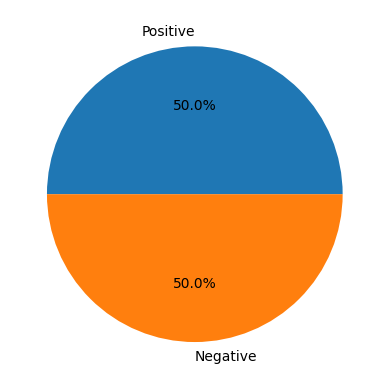

In [47]:

plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), 
        labels=['Positive', 'Negative'], 
        autopct='%1.1f%%') 
plt.show()


Model training and evaluation

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [49]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [50]:
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

LogisticRegression

In [51]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.935
	Precision = 0.908
	Recall = 0.967
	F1-Score = 0.937
Testing Scores:
	Accuracy = 0.866
	Precision = 0.677
	Recall = 0.858
	F1-Score = 0.757


Naive bayes

In [52]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.897
	Precision = 0.863
	Recall = 0.945
	F1-Score = 0.902
Testing Scores:
	Accuracy = 0.862
	Precision = 0.654
	Recall = 0.922
	F1-Score = 0.766


Decision tree

In [53]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 1.0
	Recall = 0.998
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.821
	Precision = 0.645
	Recall = 0.588
	F1-Score = 0.615


Random Forest

In [54]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.862
	Precision = 0.741
	Recall = 0.666
	F1-Score = 0.701


Support vecter machine

In [55]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.974
	Precision = 0.955
	Recall = 0.994
	F1-Score = 0.974
Testing Scores:
	Accuracy = 0.868
	Precision = 0.701
	Recall = 0.801
	F1-Score = 0.747


In [56]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)

In [57]:
x_test.shape

(1584,)